#### Notebook to read dataset provided by Momayyezi et al. 2022 and estimate $(\tau,\gamma)$

running the notebook in order will produce a modified data file in the folder "saved_data" if it doesn't already exist.

In [1]:
import pandas as pd 
import sys
sys.path.append('../../modules/')
import estimator as est

df_dehydrated = pd.read_csv('../raw_data/dehydrated_dataset_Momayyezi_et_al_2022.csv', decimal=',', sep=';')
df_watered = pd.read_csv('../raw_data/watered_dataset_Momayyezi_et_al_2022.csv', decimal=',', sep=';')

# Data provided by Momayyezi et al. 2022
# DOI: https://doi.org/10.1111/pce.14287 

# UNITS:
# Assimilation rate:    µmol/m^2/s
# Stomatal conductance: mol/m^2/s
# Ias conductance:      mol/m^2/s
# Atmospheric CO2:      µmol/mol
# Compensation point:   µmol/mol

df_watered.head(3)


,accession,assimilation_rate,d_assimilation_rate,stomatal_conductance,d_stomatal_conductance,ias_conductance,d_ias_conductance,atmospheric_CO2,compensation_point,d_compensation_point
0,A1,11.98,0.69,0.15,0.04,1.10,0.23,409.353,38.18,0.47
1,A2,12.48,1.02,0.10,0.01,0.99,0.26,409.353,38.18,0.47
2,A3,16.10,1.16,0.18,0.02,0.89,0.12,409.353,38.18,0.47


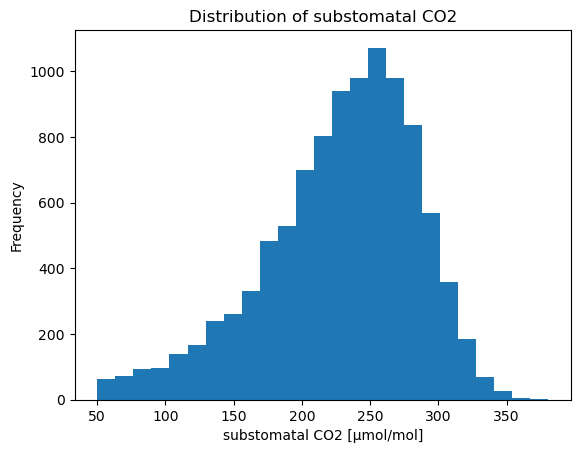

 27%|██▋       | 3/11 [00:05<00:14,  1.76s/it]

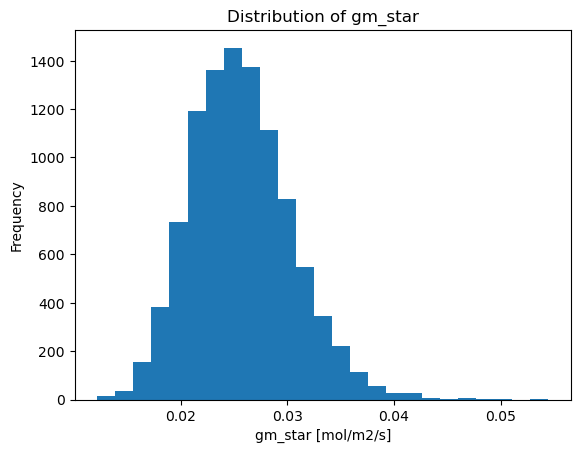

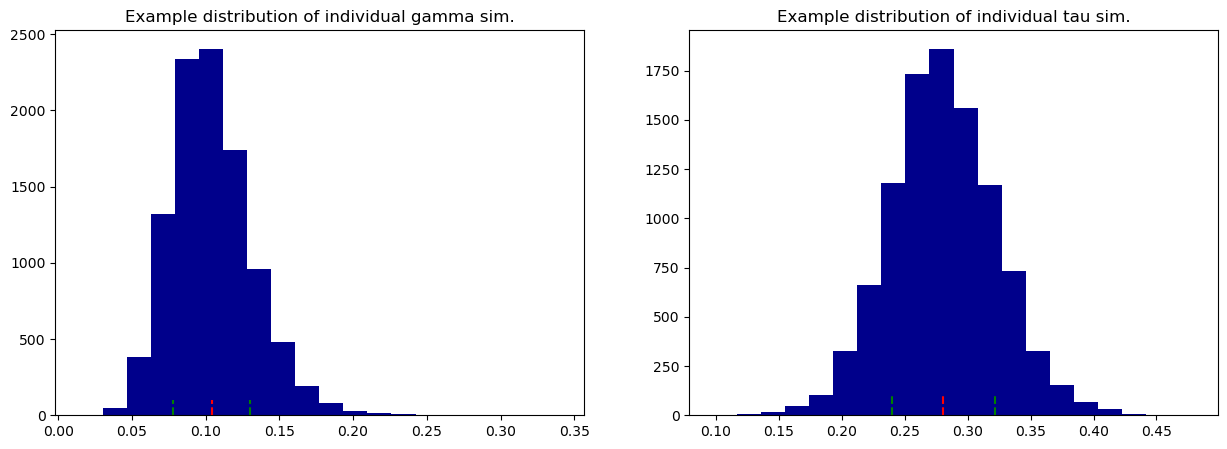

100%|██████████| 11/11 [00:21<00:00,  1.99s/it]


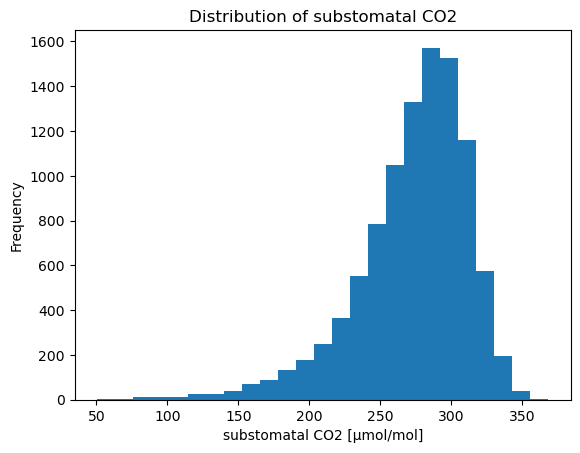

 27%|██▋       | 3/11 [00:05<00:15,  1.89s/it]

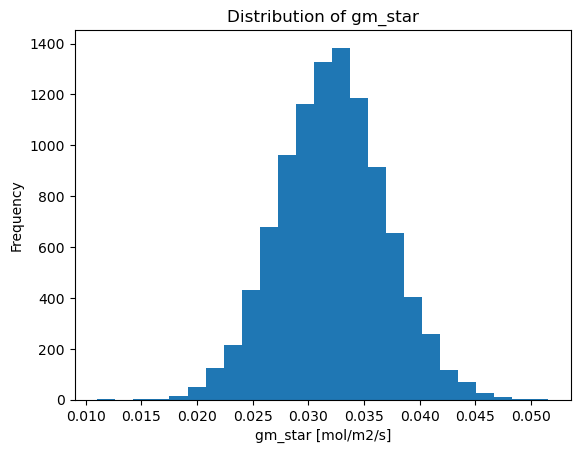

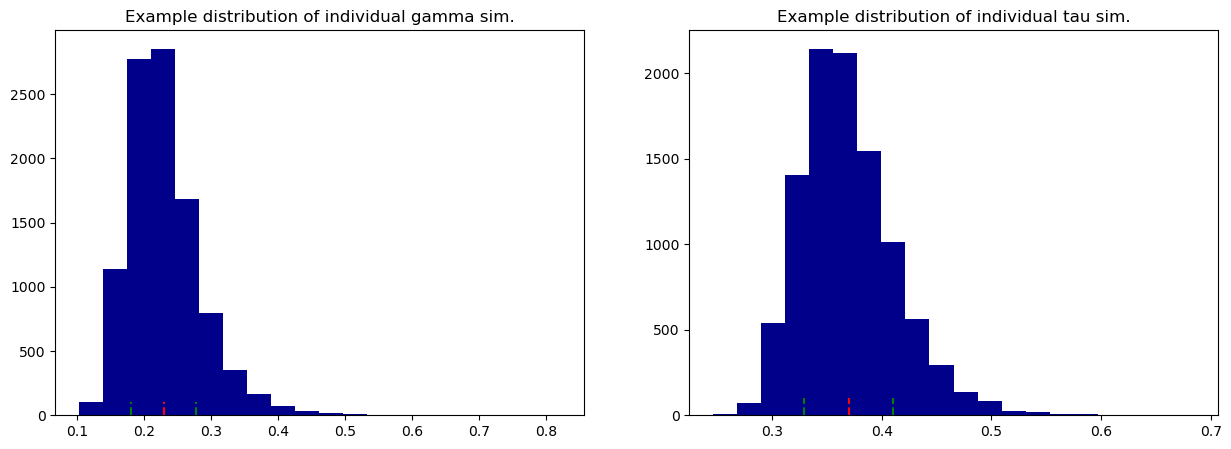

100%|██████████| 11/11 [00:22<00:00,  2.04s/it]


In [2]:
for df in [df_dehydrated, df_watered]:
    # since dataset doesn't include substomatal CO2 conc. Ci explicitly, we calculate it as Ci = Ca - An/gs
    df = est.estimate_Ci_values(df, plot_sample=True)
    # since dataset doesn't include gm* we calculate it as gm* = An/(Ci - C*)
    df = est.estimate_gm_star_values(df, plot_sample=True)
    # calculate (tau, gamma)
    df, (taus, dtaus), (gammas, dgammas) = est.estimate_principle_parameters(df, plot_sample=True)

df_dehydrated.to_csv('../saved_data/Momayyezi2022_dehydrated.csv', decimal=',', sep=';')
df_watered.to_csv('../saved_data/Momayyezi2022_watered.csv', decimal=',', sep=';')